<a href="https://colab.research.google.com/github/TarunBevara10/Mini-Project/blob/main/Image_Classification_Minor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#DATA IMAGES HAS BEEN COLLECTED BY MOUNTING FROM GOOGLE DRIVE

In [2]:
#PREPROCESSING
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/Colab Notebooks/images'
CATAGORIES = ['aeroplane','soccer ball','violin']

for category in CATAGORIES:
  class_num = CATAGORIES.index(category) #LABEL ENCODING THE VALUES
  path = os.path.join(DATADIR,category) #CREATE PATH TO USE ALL IMAGES
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3)) #NORMALIZES THE VALUE FROM 0 TO 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [3]:
len(flat_data[0])

67500

In [4]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<BarContainer object of 3 artists>

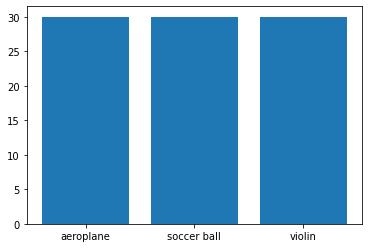

In [5]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATAGORIES,count)

In [6]:
#SPLITTING DATA INTO TRAINING AND TESTING:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [8]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 2, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 0, 0, 1])

In [9]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [10]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [11]:
accuracy_score(y_pred,y_test)

0.7777777777777778

In [12]:
confusion_matrix(y_pred,y_test)

array([[5, 0, 0],
       [1, 9, 1],
       [2, 2, 7]])

In [13]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [14]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://cdn.insidesport.co/wp-content/uploads/2020/10/07193932/fifa.jpg
(800, 1200, 3)
PREDICTED OUTPUT: soccer ball


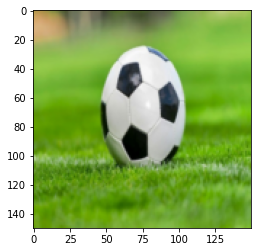

In [27]:
#TESTING A BRAND NEW IMAGE
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATAGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')